In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

## Week 1

### Load data

In [117]:
# load data
gdf = gpd.GeoDataFrame.from_file(
    "challenge-01\\georgia-1880-county-shapefile\\DuBoisChallenge - Georgia Counties w 1870 & 1880 data.shp")

### Visualise

In [154]:
bg_color = "#E3D1C0"

colors = {'> 1000': "#576758",
            '1000 - 2500': "#E9B455",
            '2500 - 5000':"#E59894" ,
            '5000 - 10000': "#D21F41",
            '10000 - 15000':"#C39F85",
            '20000 - 30000':  "#6B4732",
             '15000 - 20000' :"#352C6E" ,
             None : bg_color}

gdf["color_1870"] = gdf["data1870 ("].map(colors)
gdf["color_1880"] = gdf["data1880_P"].map(colors)

import random
gdf["alpha"] = [random.uniform(0.85, 0.95) for i in range(len(gdf)) ]

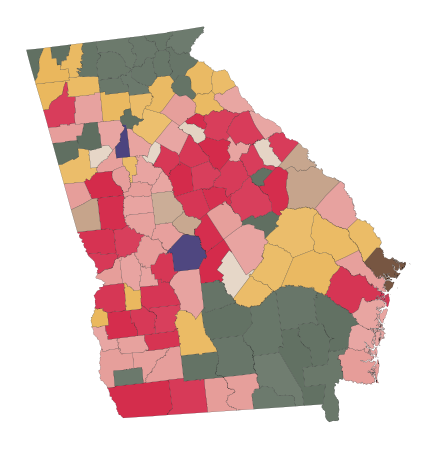

In [155]:
fig, ax = plt.subplots(figsize=(8,8))

gdf.plot(ax=ax, color=gdf["color_1870"], alpha=gdf["alpha"], edgecolor="black", lw=0.15)

ax.axis("off")

plt.show()